In [206]:
import numpy
import seaborn
from scipy import stats
import csv
import pandas

# Hamming weight calculator (coded with help from the knowledge learnt from the Lab 2 lesson)
def hw(int_no):
    count = 0
    while(int_no):
        int_no &= (int_no-1)
        count += 1
    return count

Sbox = (
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16,
)

In [207]:
df = pandas.read_csv('anotherownwaveform.csv')

In [208]:
# arguments: key byte index (plaintext byte index) you want to build a power model for
# for this index, for each of the 100 plaintexts, xor each corresponding plaintext byte with 256 possible key bytes
# return a 256x100 power model M for that plaintext byte

# byteindex ranges from 0 to 15
def powermodelgenerator(byteindex):
    byteindex *= 2
    singleresultrow = []
    resultpowermodel = []
    
    # key ranges from 0 to 255
    for key in range(0x00,0x100):
        for i in range(0,100):
            tmp = "0x" + df.iloc[i,0][byteindex:byteindex+2]
            tmpagain = int(tmp,16) ^ key
            tmpfinal = Sbox[tmpagain]
            singleresultrow.append(hw(tmpfinal))
        resultpowermodel.append(singleresultrow)
        singleresultrow = []
        
    return resultpowermodel

In [209]:
# m is a 256 times 100 power model: m[0 to 255][0 to 99]
# time to correlate each m[0] to m[255] with each df.iloc[:,2] to df.iloc[:,2501]
# power traces captured in lab t ranges from df.iloc[:,2] to df.iloc[:,2501]

# arguments: powermodel we built earlier
def correlationmatrixgenerator(powermodel):
    singleresultrow = []
    correlationmatrix = []
    
    for i in range(0,256):
        for j in range(2,2502):
            singleresultrow.append(abs(stats.pearsonr(m[i],df.iloc[:,j])[0]))
        correlationmatrix.append(singleresultrow)
        singleresultrow = []
    
    return correlationmatrix

In [210]:
# plots the required graph using an obtained correlationmatrix
def plotgraph(correlationmatrix, byteindex):
    
    # time to find the highest correlation value in each row of correlationmatrix, so 256 highest values
    highestvaluearray = []
    for row in correlationmatrix:
        highestvaluearray.append(max(row))
        
    # time to plot a graph for a key byte: x-axis: value of key byte, y-axis: correlation value
    print("Graph for byte number: " + str(byteindex))
    
    seaborn.set(rc={'figure.figsize':(20,10)})
    plot = seaborn.lineplot(data=highestvaluearray)
    plot.set_xlabel("Value of key byte", fontsize = 20)
    plot.set_ylabel("Correlation value", fontsize = 20)
    
    print("Highest correlation value: " + str(max(highestvaluearray)))
    for i in range(0,256):
        if highestvaluearray[i]==max(highestvaluearray):
            print("Recovered key byte: " + str(hex(i)))
            
            # return the recovered key byte
            return hex(i)

Graph for byte number: 0
Highest correlation value: 0.7469190510872585
Recovered key byte: 0x4c


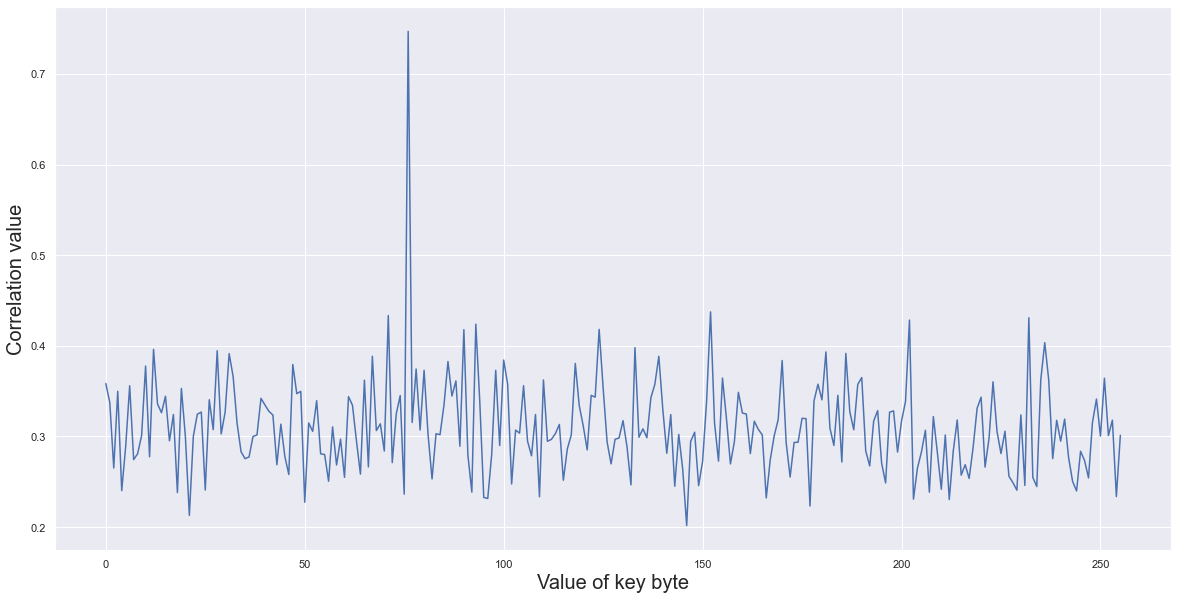

In [213]:
# Now let's generate the graph for the first key byte
m = powermodelgenerator(0)

# These are debugging statements for development use.
# print(bin(Sbox[0xFD ^ 0x56]))
# print(m[253][99])
# print(Sbox[0xFE ^ 0x56])
# print(m[254][99])
# print(bin(Sbox[0xFF ^ 0x56]))
# print(m[255][99])
# print(Sbox[0xAA ^ 0xF8])
# print(m[170][5])

# This will collect the recovered key bytes:
recoveredkeybytes = []

correlationmatrix = correlationmatrixgenerator(m)
recoveredkeybytes.append(plotgraph(correlationmatrix,0))

Graph for byte number: 1
Highest correlation value: 0.7074481672016952
Recovered key byte: 0x49


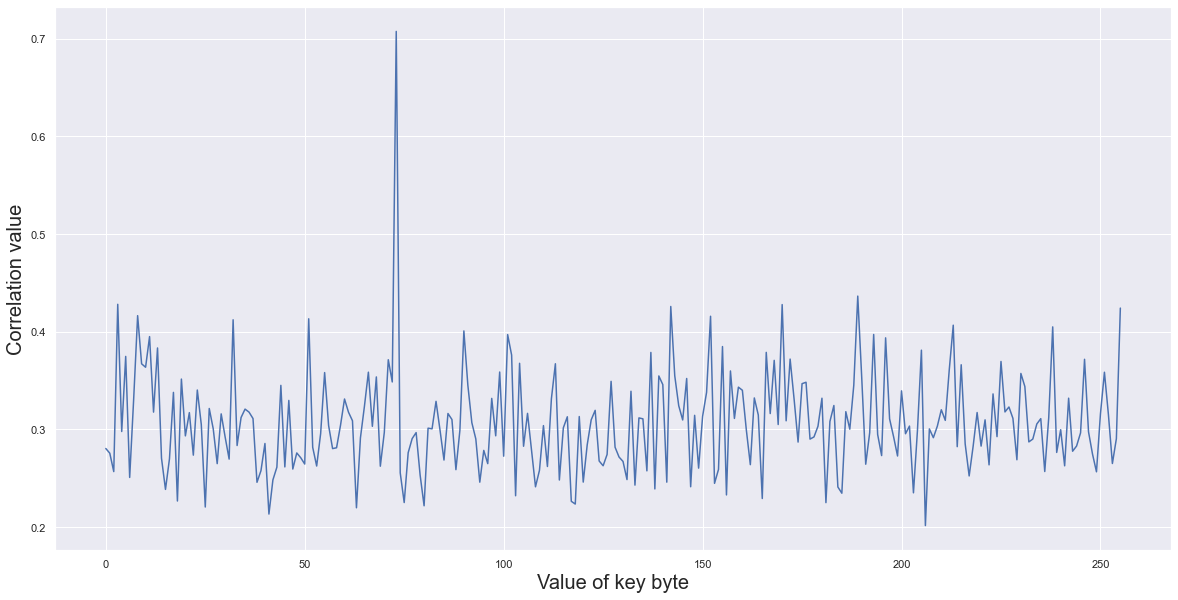

In [215]:
# Time to generate the rest of the graphs and find out our recovered key:
m = powermodelgenerator(1)
correlationmatrix = correlationmatrixgenerator(m)
recoveredkeybytes.append(plotgraph(correlationmatrix,1))

Graph for byte number: 2
Highest correlation value: 0.5981468222883599
Recovered key byte: 0x46


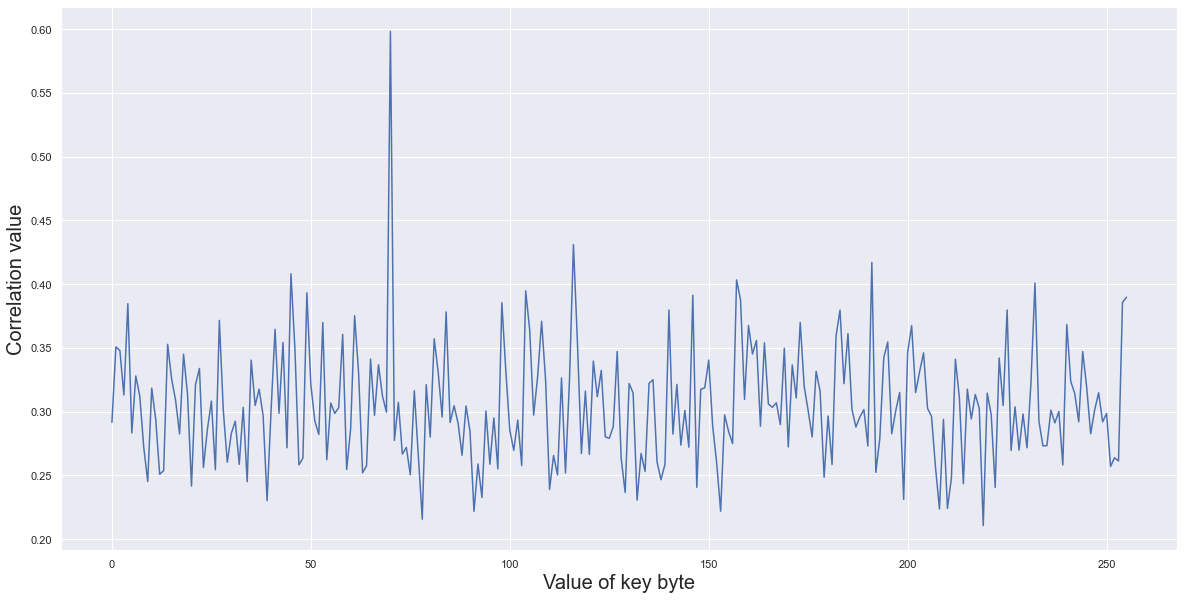

In [216]:
# Time to generate the rest of the graphs and find out our recovered key:
m = powermodelgenerator(2)
correlationmatrix = correlationmatrixgenerator(m)
recoveredkeybytes.append(plotgraph(correlationmatrix,2))

Graph for byte number: 3
Highest correlation value: 0.7474320782405013
Recovered key byte: 0x45


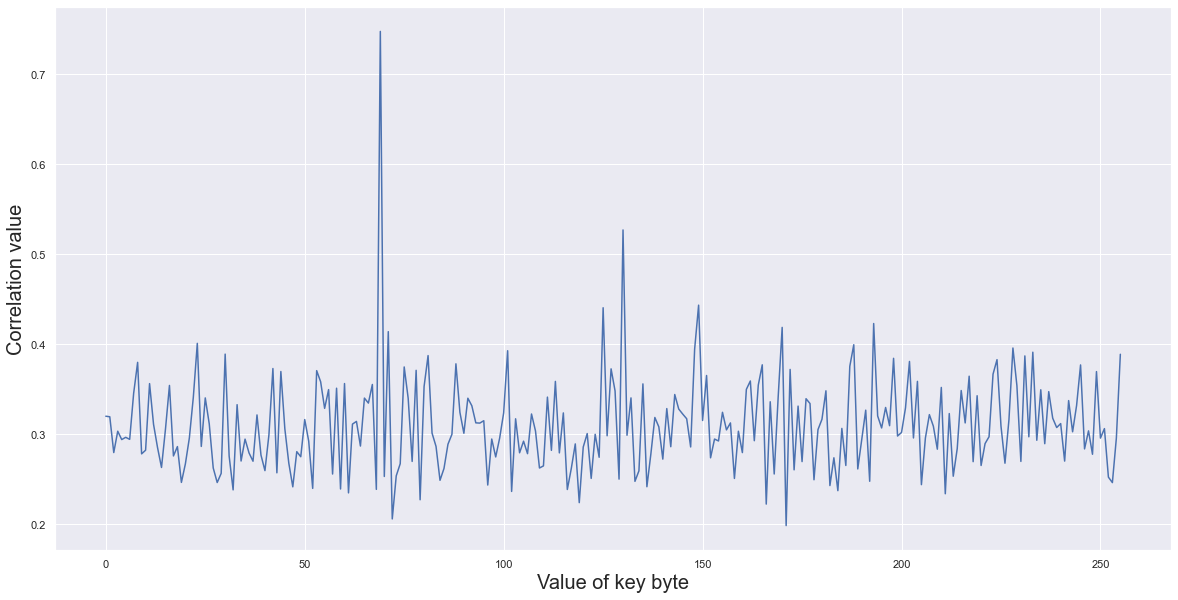

In [217]:
# Time to generate the rest of the graphs and find out our recovered key:
m = powermodelgenerator(3)
correlationmatrix = correlationmatrixgenerator(m)
recoveredkeybytes.append(plotgraph(correlationmatrix,3))

Graph for byte number: 4
Highest correlation value: 0.6810405567669411
Recovered key byte: 0x49


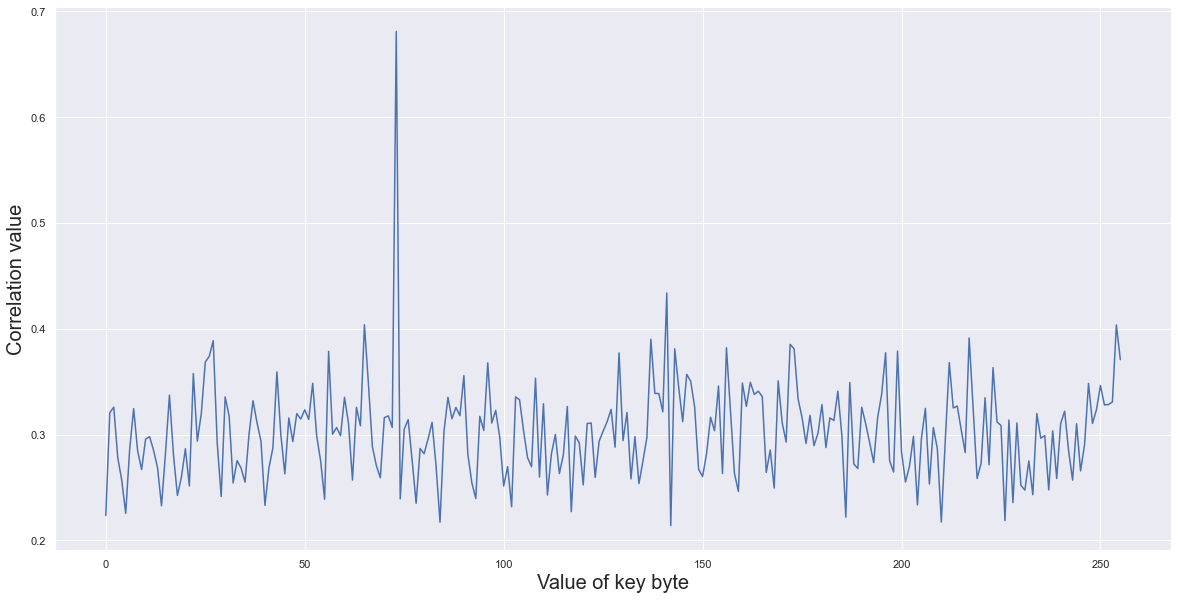

In [218]:
# Time to generate the rest of the graphs and find out our recovered key:
m = powermodelgenerator(4)
correlationmatrix = correlationmatrixgenerator(m)
recoveredkeybytes.append(plotgraph(correlationmatrix,4))

Graph for byte number: 5
Highest correlation value: 0.6610132529375801
Recovered key byte: 0x53


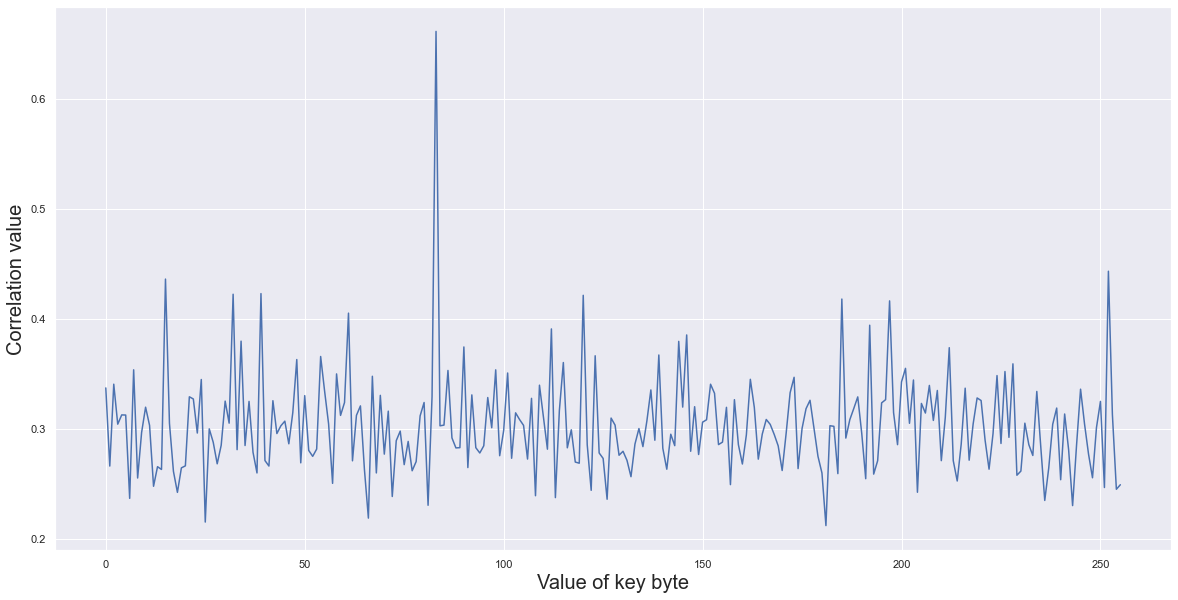

In [219]:
# Time to generate the rest of the graphs and find out our recovered key:
m = powermodelgenerator(5)
correlationmatrix = correlationmatrixgenerator(m)
recoveredkeybytes.append(plotgraph(correlationmatrix,5))

Graph for byte number: 6
Highest correlation value: 0.6464015183106125
Recovered key byte: 0x47


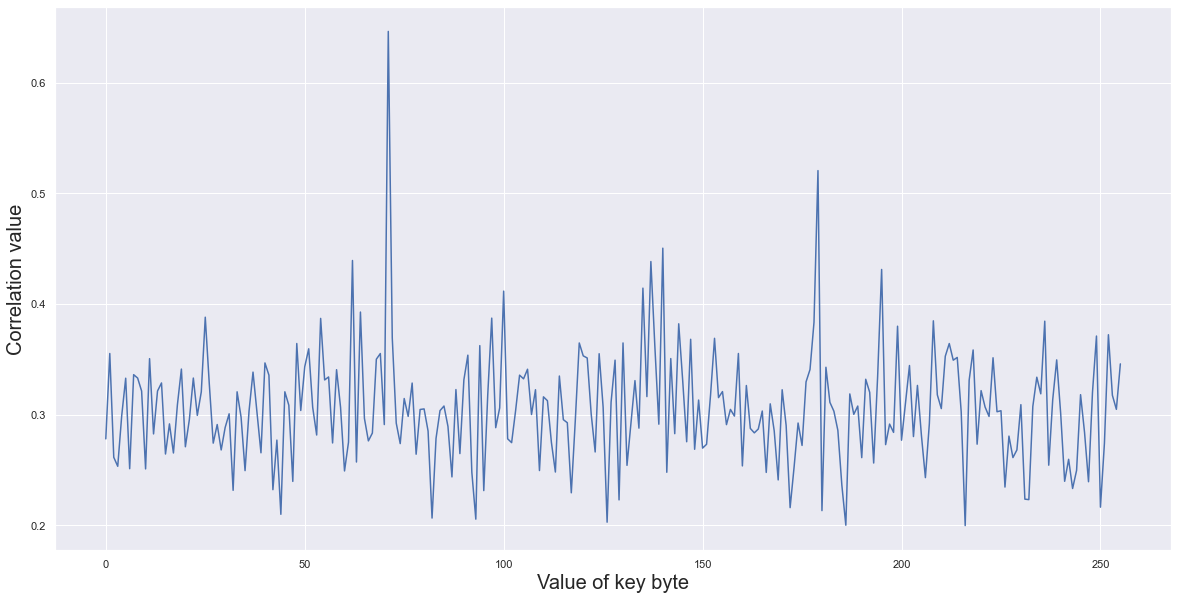

In [220]:
# Time to generate the rest of the graphs and find out our recovered key:
m = powermodelgenerator(6)
correlationmatrix = correlationmatrixgenerator(m)
recoveredkeybytes.append(plotgraph(correlationmatrix,6))

Graph for byte number: 7
Highest correlation value: 0.6180139097336745
Recovered key byte: 0x52


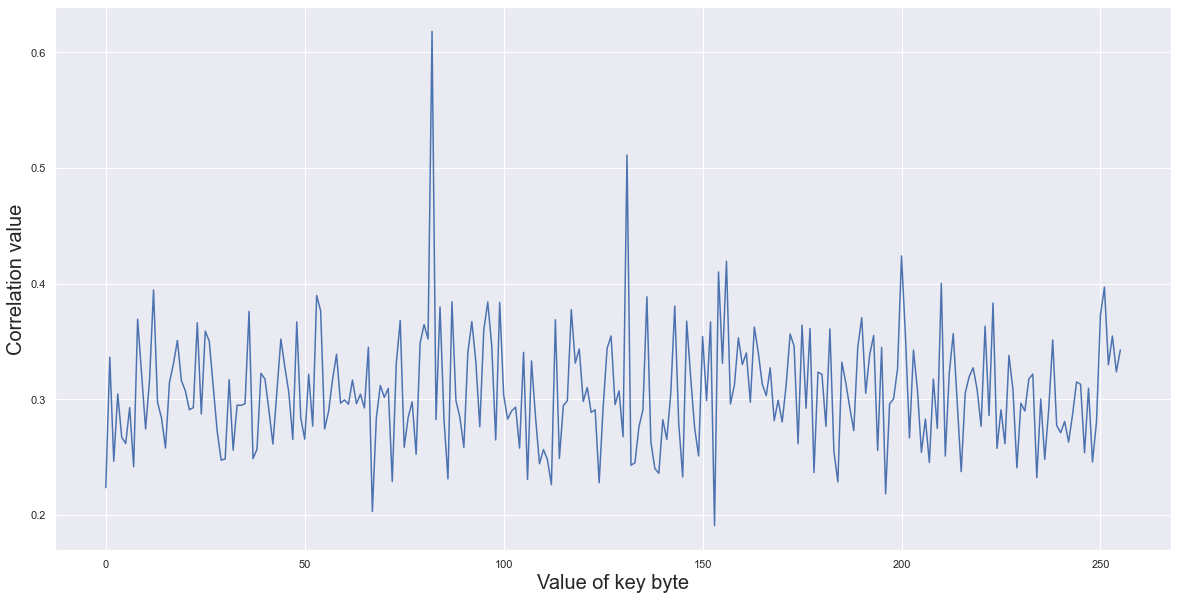

In [221]:
# Time to generate the rest of the graphs and find out our recovered key:
m = powermodelgenerator(7)
correlationmatrix = correlationmatrixgenerator(m)
recoveredkeybytes.append(plotgraph(correlationmatrix,7))

Graph for byte number: 8
Highest correlation value: 0.6326019650687962
Recovered key byte: 0x45


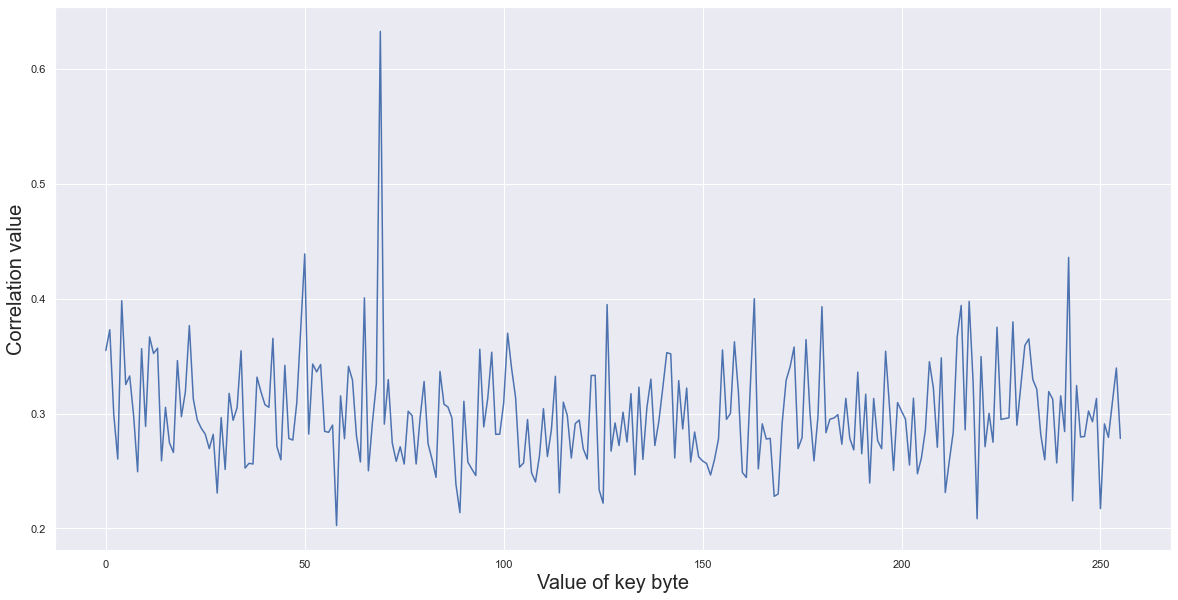

In [222]:
# Time to generate the rest of the graphs and find out our recovered key:
m = powermodelgenerator(8)
correlationmatrix = correlationmatrixgenerator(m)
recoveredkeybytes.append(plotgraph(correlationmatrix,8))

Graph for byte number: 9
Highest correlation value: 0.6655987689790792
Recovered key byte: 0x41


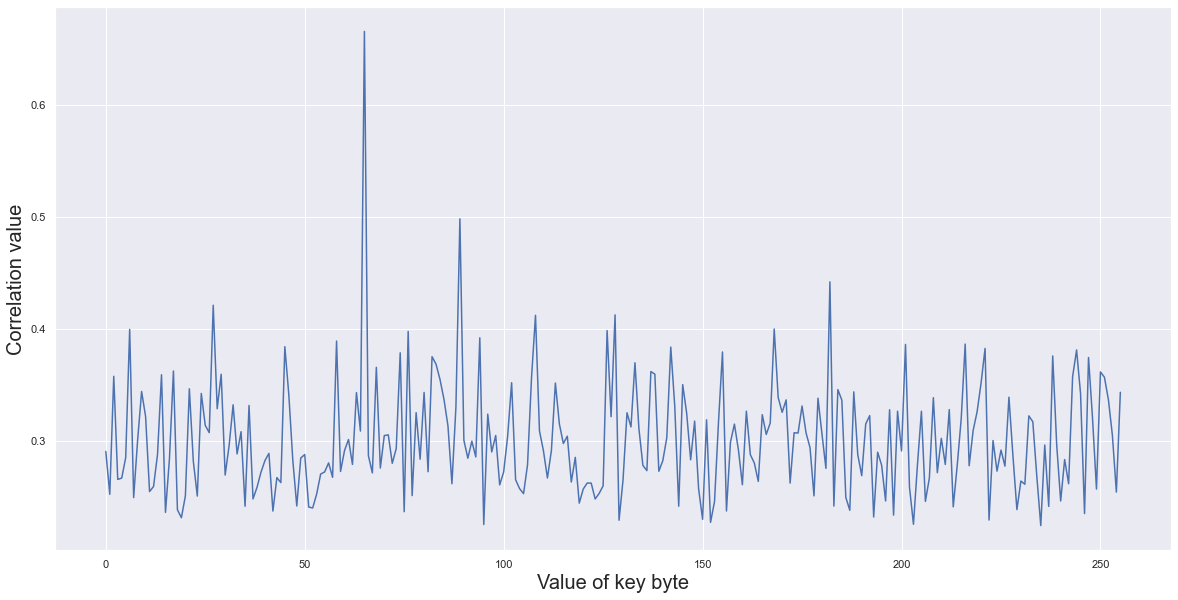

In [223]:
# Time to generate the rest of the graphs and find out our recovered key:
m = powermodelgenerator(9)
correlationmatrix = correlationmatrixgenerator(m)
recoveredkeybytes.append(plotgraph(correlationmatrix,9))

Graph for byte number: 10
Highest correlation value: 0.6716498484069444
Recovered key byte: 0x54


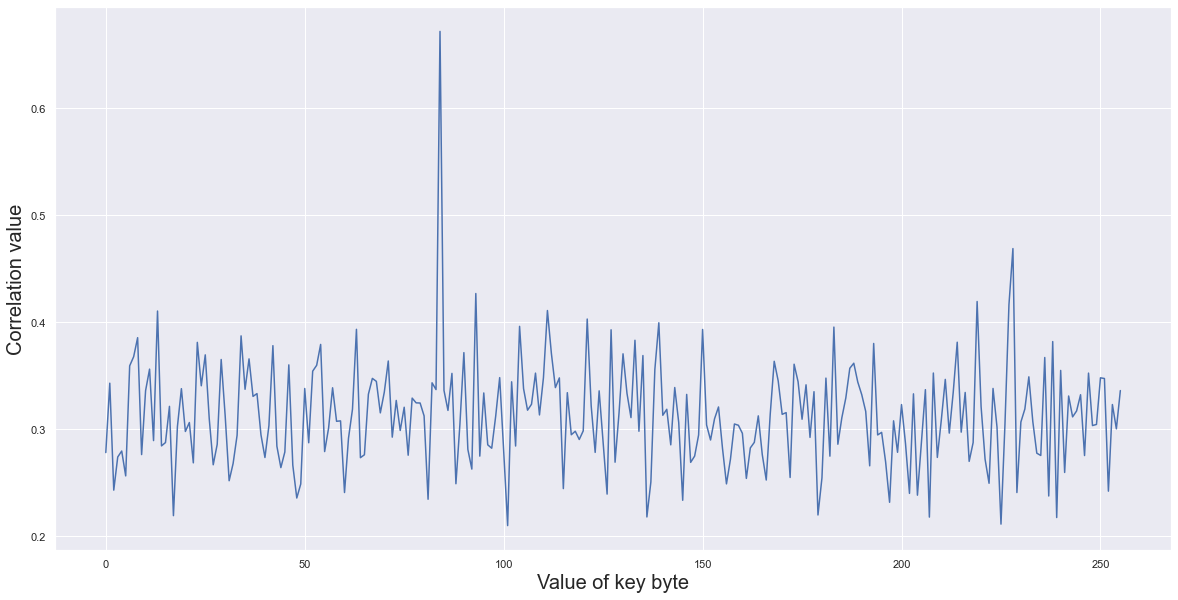

In [224]:
# Time to generate the rest of the graphs and find out our recovered key:
m = powermodelgenerator(10)
correlationmatrix = correlationmatrixgenerator(m)
recoveredkeybytes.append(plotgraph(correlationmatrix,10))

Graph for byte number: 11
Highest correlation value: 0.5067094344412493
Recovered key byte: 0x53


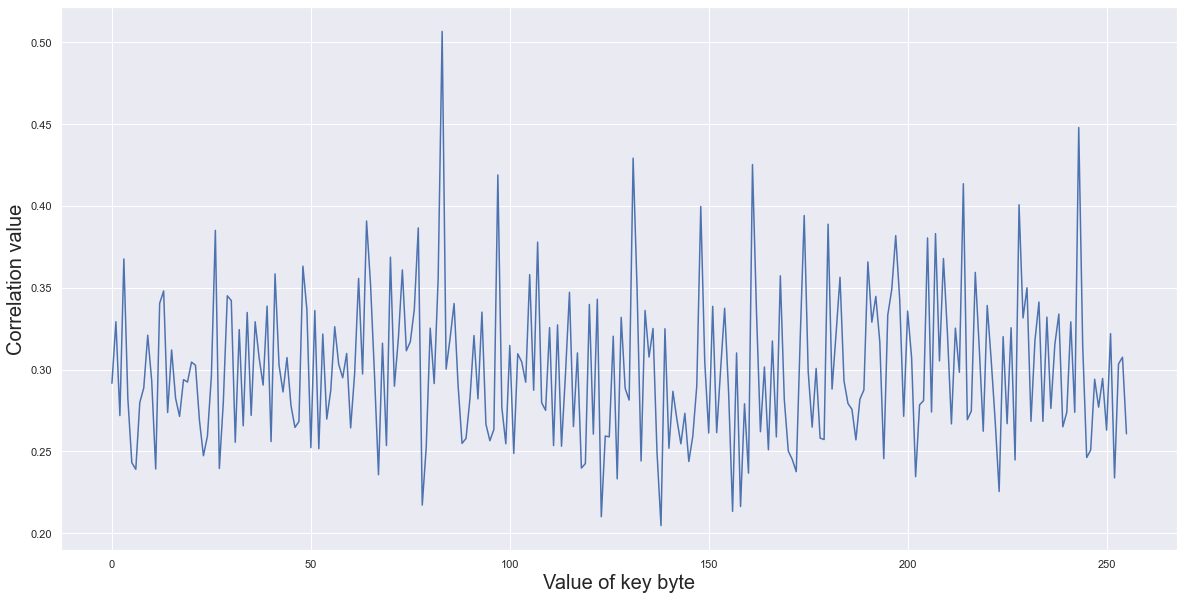

In [225]:
# Time to generate the rest of the graphs and find out our recovered key:
m = powermodelgenerator(11)
correlationmatrix = correlationmatrixgenerator(m)
recoveredkeybytes.append(plotgraph(correlationmatrix,11))

Graph for byte number: 12
Highest correlation value: 0.5425991847253301
Recovered key byte: 0x49


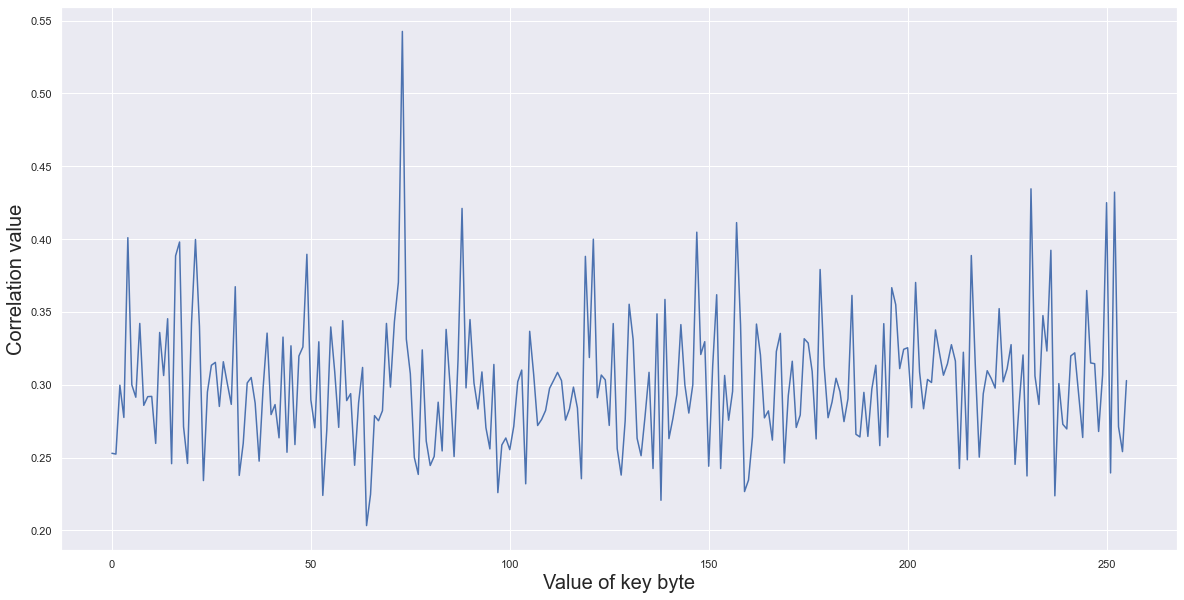

In [226]:
# Time to generate the rest of the graphs and find out our recovered key:
m = powermodelgenerator(12)
correlationmatrix = correlationmatrixgenerator(m)
recoveredkeybytes.append(plotgraph(correlationmatrix,12))

Graph for byte number: 13
Highest correlation value: 0.5533618078257962
Recovered key byte: 0x4b


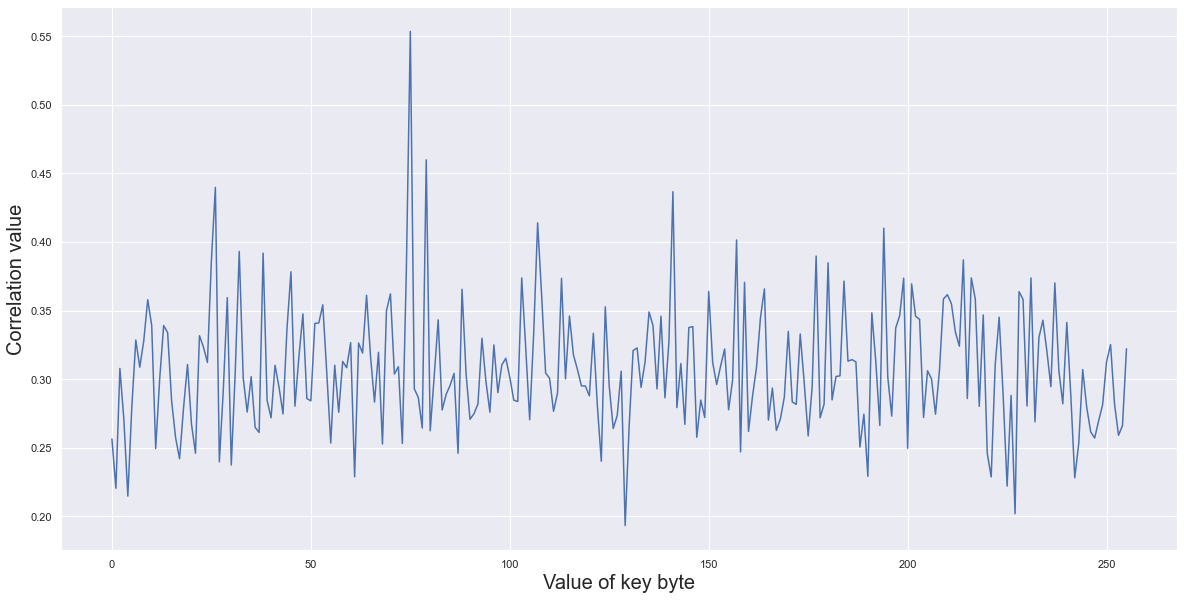

In [227]:
# Time to generate the rest of the graphs and find out our recovered key:
m = powermodelgenerator(13)
correlationmatrix = correlationmatrixgenerator(m)
recoveredkeybytes.append(plotgraph(correlationmatrix,13))

Graph for byte number: 14
Highest correlation value: 0.6582853672652147
Recovered key byte: 0x45


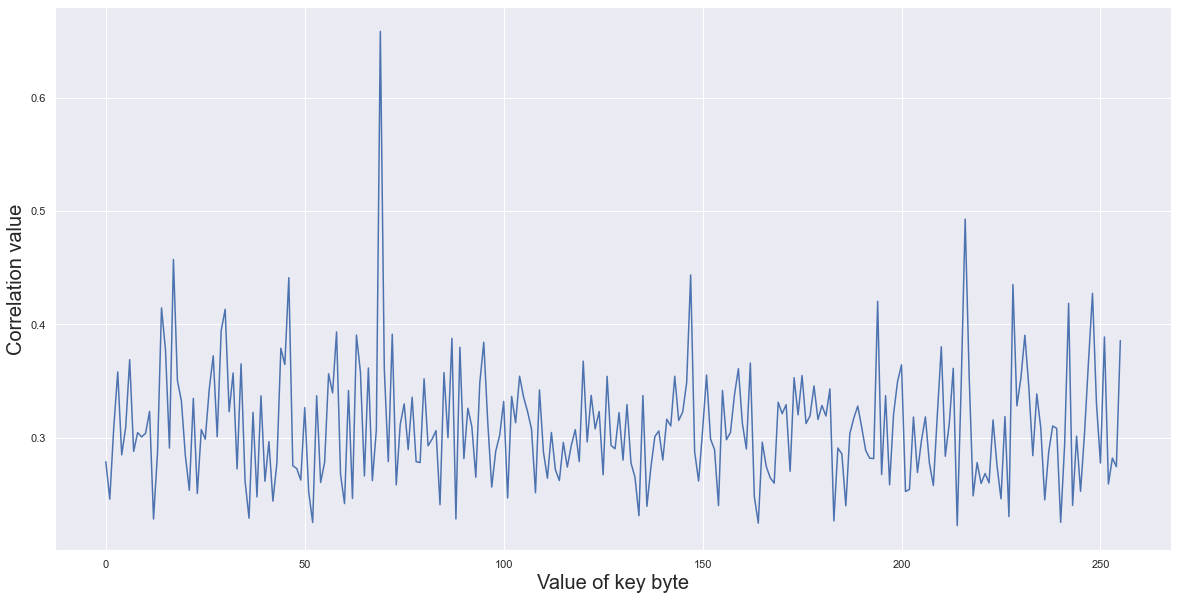

In [228]:
# Time to generate the rest of the graphs and find out our recovered key:
m = powermodelgenerator(14)
correlationmatrix = correlationmatrixgenerator(m)
recoveredkeybytes.append(plotgraph(correlationmatrix,14))

Graph for byte number: 15
Highest correlation value: 0.5916939618914787
Recovered key byte: 0x53


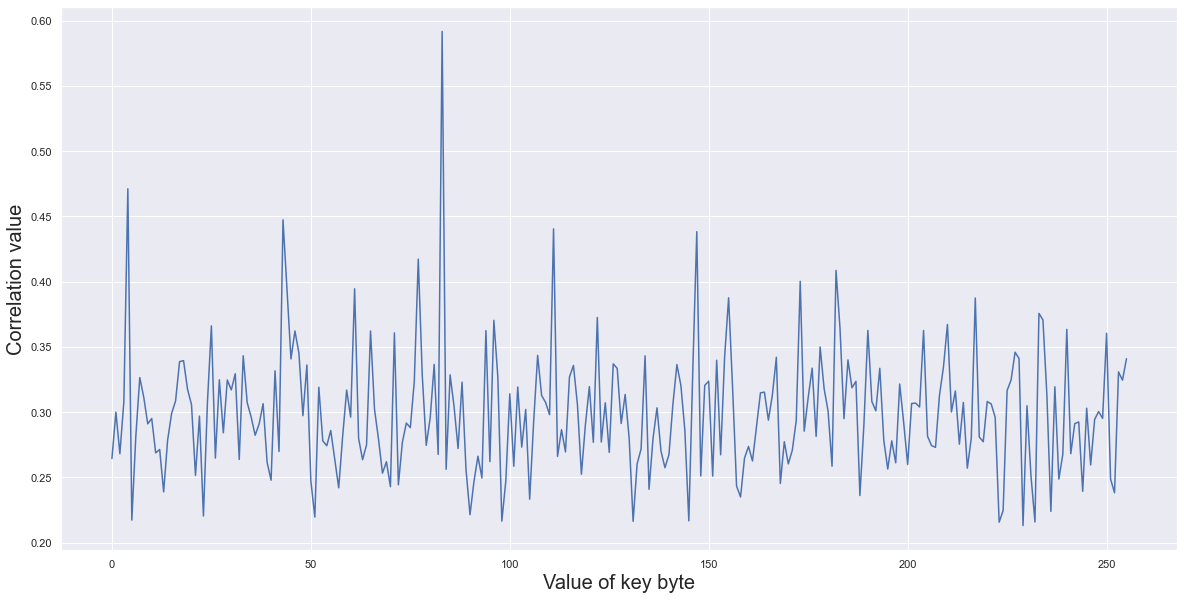

In [229]:
# Time to generate the rest of the graphs and find out our recovered key:
m = powermodelgenerator(15)
correlationmatrix = correlationmatrixgenerator(m)
recoveredkeybytes.append(plotgraph(correlationmatrix,15))

In [240]:
# Let's see what key we recovered:
key = ""
for byte in recoveredkeybytes:
    key += str(byte[2:])
print(key)

4c4946454953475245415453494b4553
